In [78]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function SXA_I_Example_6p5b (you'll need to specify the function definition)
def Approx_Delta(tco, tce):
    # Define the maximum allowed temperature in the reactor
    T = 100
    # Define DeltaT as calculated by the approximation
    DeltaT = 75
    DeltaT_ln = ((T - tce)-(T-tco))/np.log((T-tce)/(T-tco))
    # Here we assume a simple relation for demonstration purposes
    return DeltaT_ln - DeltaT

# Create mesh of input values
tco = np.linspace(10, 50, 400)  # range for tco from 10 to 50
tce = np.linspace(15, 75, 600)  # range for tce from 15 to 75

# Initialize matrices to store results
DT = np.zeros((len(tco), len(tce)))
Tco = np.zeros((len(tco), len(tce)))
Tce = np.zeros((len(tco), len(tce)))

# Compute DT, Tco, and Tce arrays
for i in range(len(tco)):
    for j in range(len(tce)):
        DT[i, j] = Approx_Delta(tco[i], tce[j])
        Tco[i, j] = tco[i]
        Tce[i, j] = tce[j]

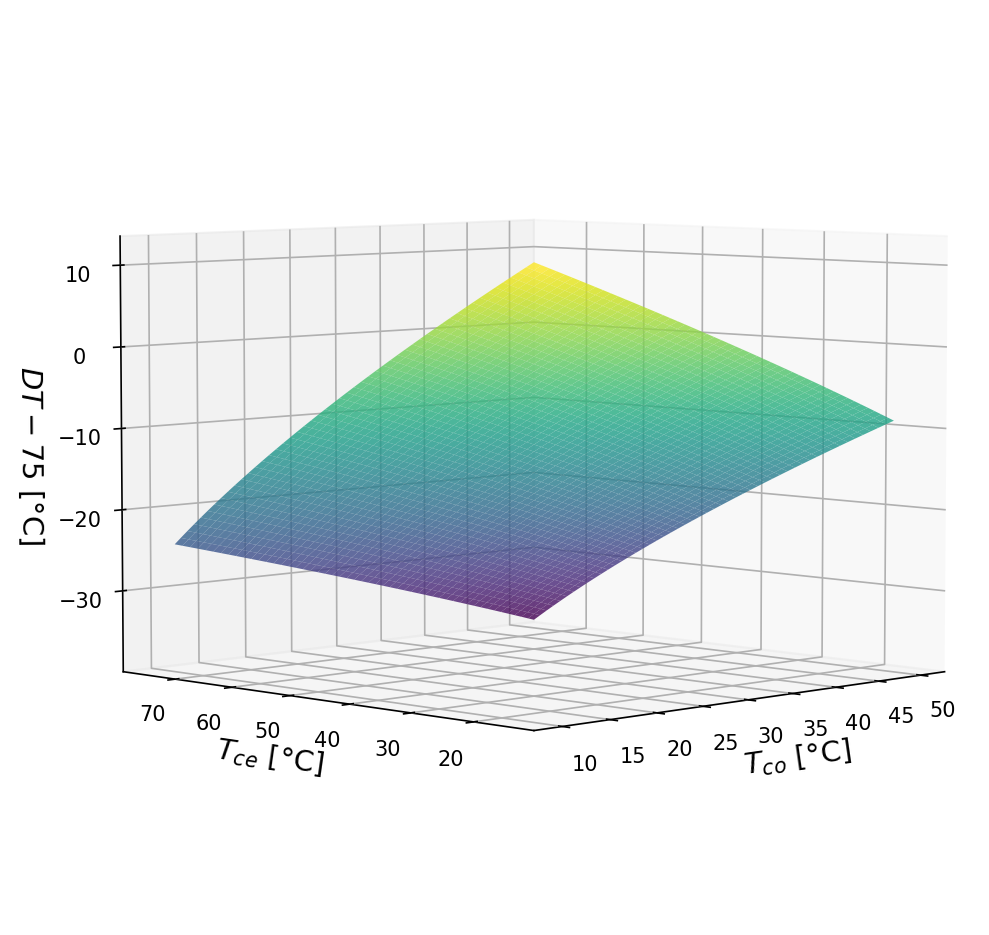

In [99]:
# Plotting 3D Surface
fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
surf = ax.plot_surface(Tco, Tce, DT, cmap='viridis', edgecolor='none', alpha=0.8)

# Labels and formatting
ax.set_xlabel(r'$T_{co}$ [°C]', fontsize=14)
ax.set_ylabel(r'$T_{ce}$ [°C]', fontsize=14)
ax.set_zlabel(r'$DT - 75$ [°C]', fontsize=14)

# Set viewpoint/rotation
ax.view_init(elev=5, azim=225)  # Adjust elev (up-down) and azim (left-right) angles

# Display the plot
#plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

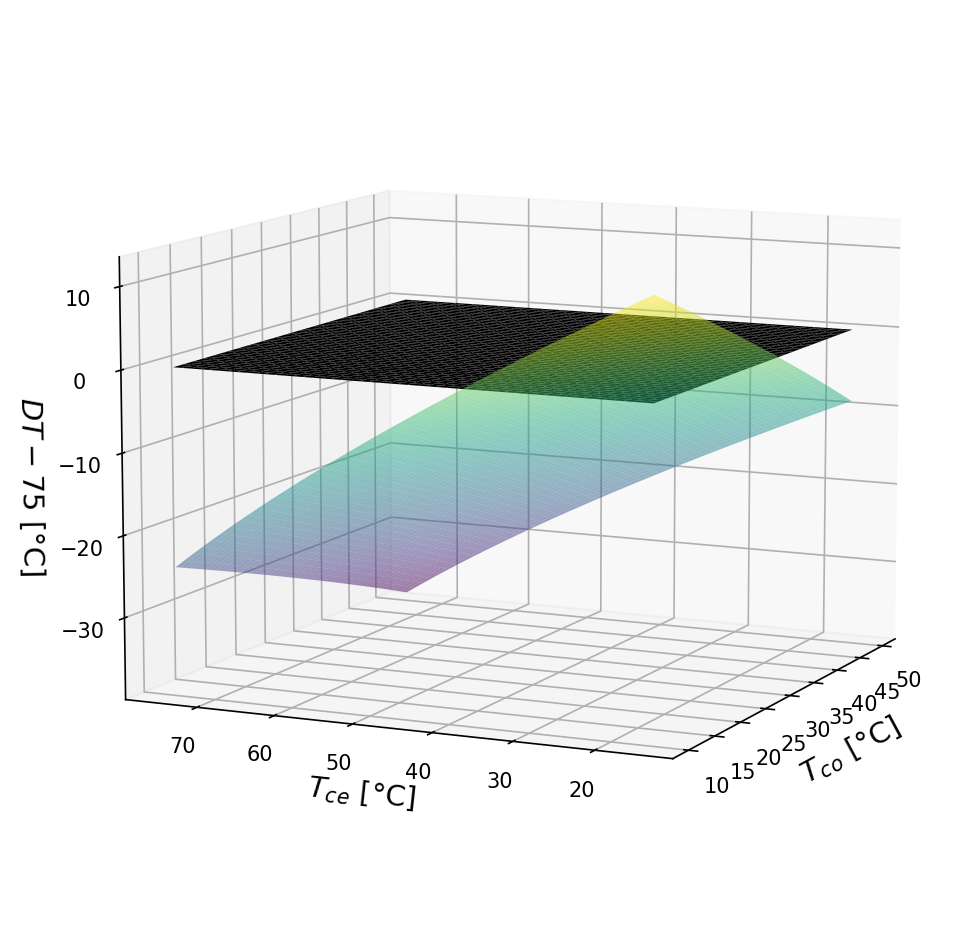

In [101]:
# Plotting 3D Surface with cross-sectional plane at z = 0
fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface mesh
surf = ax.plot_surface(Tco, Tce, DT, cmap='viridis', edgecolor='none', alpha=0.5)

# Plot a black surface at z = 0
ax.plot_surface(Tco, Tce, np.zeros_like(DT), color='k', alpha=1)

# Labels and formatting
ax.set_xlabel(r'$T_{co}$ [°C]', fontsize=14)
ax.set_ylabel(r'$T_{ce}$ [°C]', fontsize=14)
ax.set_zlabel(r'$DT - 75$ [°C]', fontsize=14)

# Set viewpoint/rotation
ax.view_init(elev=10, azim=205)  # Adjust elev (up-down) and azim (left-right) angles

# Display the plot
#plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()


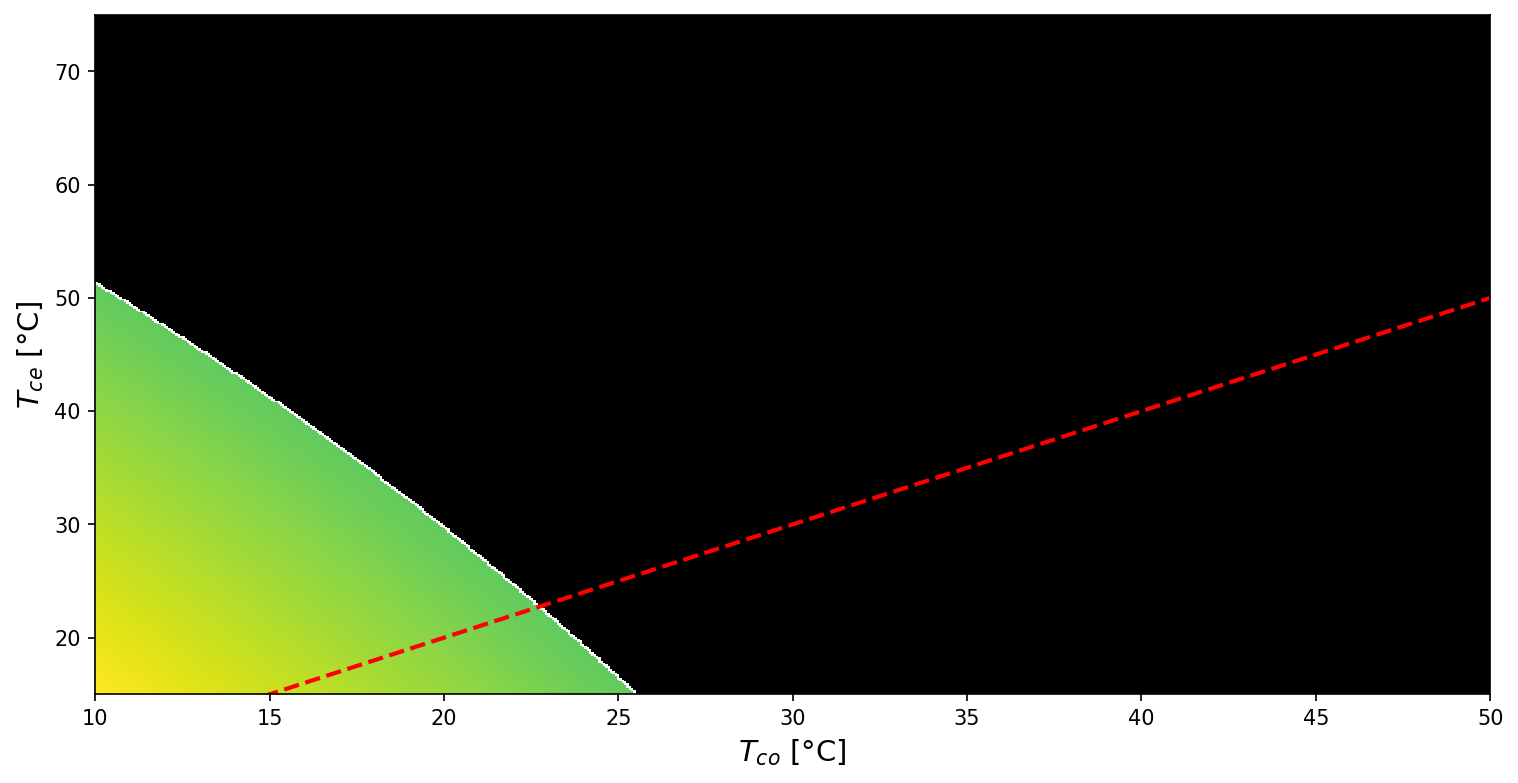

In [111]:
# Create 2D cross-sectional plane at z = 0
DT_masked = np.copy(DT)
DT_masked[DT <= 0] = np.nan  # Mask values < 0 as NaN

# Plot using imshow
plt.figure(figsize=(12, 6), dpi=150)

# Display the plot with masked values (masked values will be ignored by the colormap)
cmap = 'viridis'  # Change colormap if needed
im = plt.imshow(DT_masked, extent=[Tco.min(), Tco.max(), Tce.min(), Tce.max()],
                origin='lower', cmap=cmap, vmin=np.min(DT), vmax=np.max(DT),aspect='auto')

# Masked values will not be shown, so we'll plot them manually
# We'll plot the masked values with black color
plt.imshow(np.where(DT <= 0, 1, np.nan), extent=[Tco.min(), Tco.max(), Tce.min(), Tce.max()],
           origin='lower', cmap='gray', alpha=1,aspect='auto')

# Add the line where Tco = Tce
plt.plot(tco, tco, color='red', linestyle='--', linewidth=2, label=r'$T_{co} = T_{ce}$')

# Set the plot to start at the origin
plt.xlim(left=10)  # Start x-axis at 0
plt.ylim(bottom=15)  # Start y-axis at 0

# Add colorbar with the original colormap
#plt.colorbar(im, label=r'$DT - 75$ [°C]', shrink=0.5, aspect=5)

# Labels
plt.xlabel(r'$T_{co}$ [°C]', fontsize=14)
plt.ylabel(r'$T_{ce}$ [°C]', fontsize=14)
#plt.title('2D Cross-Section of DT at z = 0', fontsize=16)

# Show the plot
plt.show()



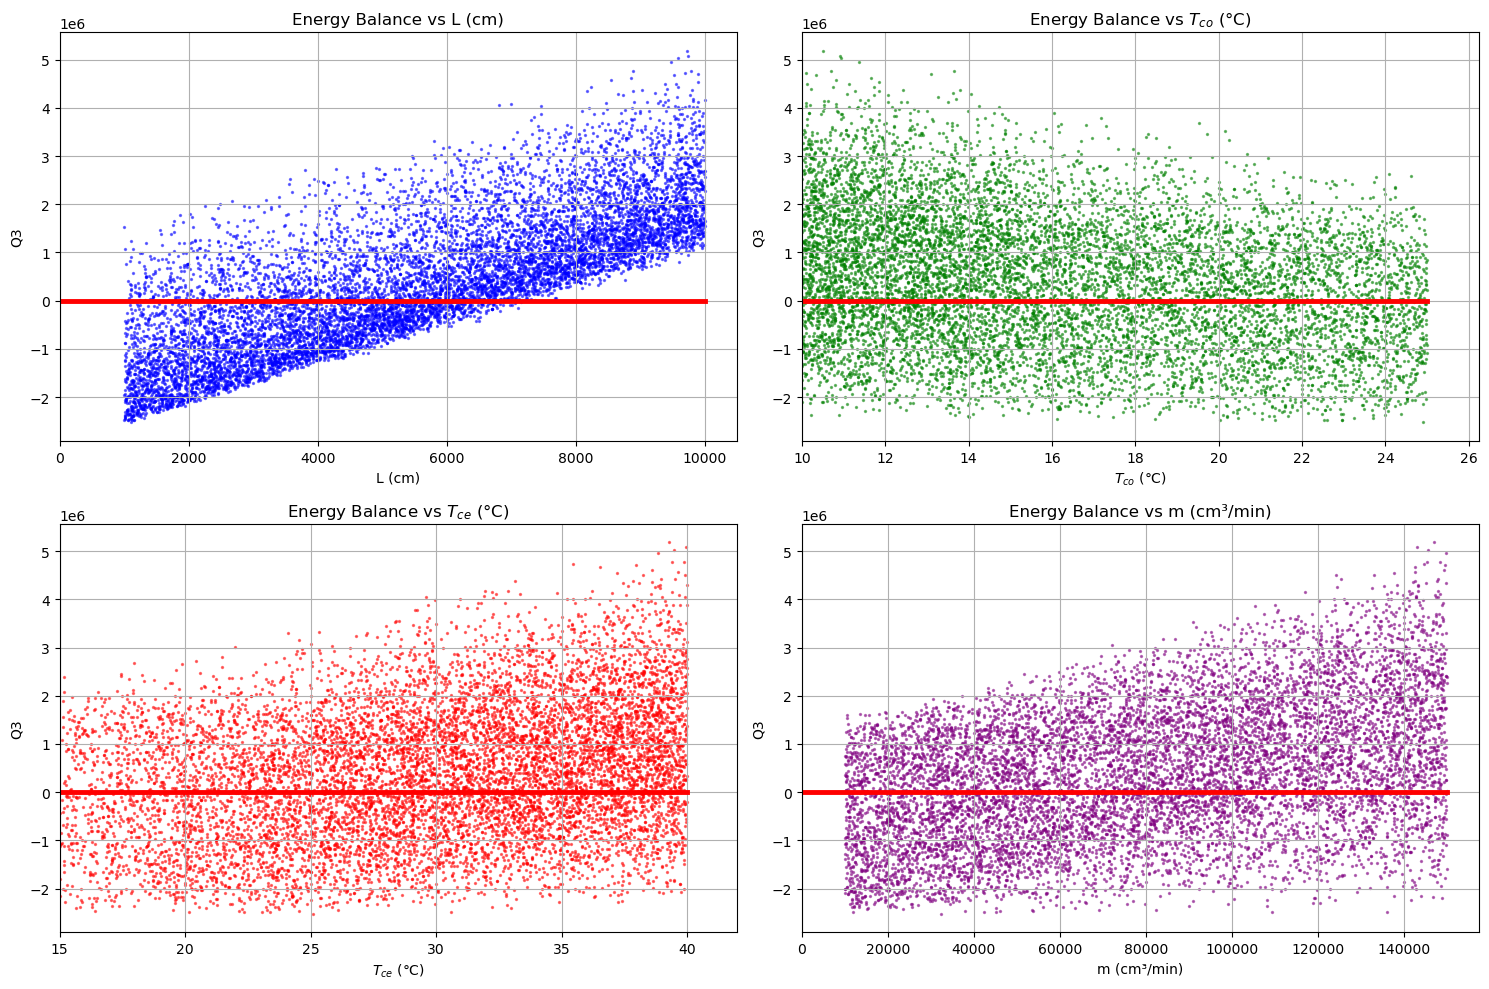

In [124]:
# Sensitivty Analysis via scatter plots

import numpy as np
import matplotlib.pyplot as plt

# Define the bounds for each parameter [L, Tco, Tce, m]
lb = [1000, 10, 15, 10000]
ub = [10000, 25, 40, 150000]

# Define the number of points
N = 10000
X_uhc = np.random.rand(N, len(lb))

# Initialize arrays
X = np.zeros_like(X_uhc)
Q_real   = np.zeros(N)
Q_approx = np.zeros(N)
Q_cumul  = np.zeros(N)

# Define the function that calculates the difference between the two energy balances
def SXA_I_Example_6p5(L, Tco, Tce, m):
    """
    Parameters:
    L : float or array
        Length of the reactor (cm).
    Tco : float
        Coolant inlet temperature (°C).
    Tce : float
        Coolant exit temperature (°C).
    m : float
        Mass flow rate (g/min).

    Returns:
    Q_real, Q_approx, Q_cumul : float or array
        Calculated heat transfer values based on given parameters.
    """

    # Model Parameters
    U = 0.011535  # Heat transfer coefficient (cal * s^-1 * cm^-2 * °C^-1)
    D = 2.5       # Spiral diameter (cm)
    Qr = 1488104.8  # Heat from reaction and inlet stream (cal/min)
    T = 100         # Reactor temperature (°C)

    # DeltaQ (Qcooling - Qreactor)
    Q_real = U * 60 * np.pi * D * L * ((T - Tce) - (T - Tco)) / np.log((T - Tce) / (T - Tco)) - Qr

    # DeltaQ (Qcooling - Qreactor) (mass flow)
    Q_approx = m * 1 * (Tce - Tco) - Qr

    # Total heat balance
    Q_cumul = Q_real + Q_approx

    return Q_real, Q_approx, Q_cumul

# Populate X and calculate Q, Q2, Q3
for i in range(N):
    X[i, :] = lb + X_uhc[i, :] * (np.array(ub) - np.array(lb))
    if X[i, 1] > X[i, 2]:  # Tco > Tce condition
        X[i, 1] = lb[1] + X_uhc[i, 2] * (ub[1] - lb[1])
        X[i, 2] = lb[2] + X_uhc[i, 1] * (ub[2] - lb[2])
    Q_real[i], Q_approx[i], Q_cumul[i] = SXA_I_Example_6p5(X[i, 0], X[i, 1], X[i, 2], X[i, 3])

# Plotting
MS = 2  # Marker size for scatter plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=100)

# Energy Balance vs L
axs[0, 0].scatter(X[:, 0], Q_cumul, s=MS, color='b', alpha=0.5)
axs[0, 0].set_title('Energy Balance vs L (cm)')
axs[0, 0].set_xlabel('L (cm)')
axs[0, 0].set_ylabel('Q3')
axs[0, 0].grid(True)
# Add the line where Tco = Tce
axs[0, 0].plot([0, np.max(X[:, 0])], [0, 0], 'r-', linewidth=3.5)  # Red line at y=0
#axs[0, 0].set_xlim([0, np.max(X[:, 0])])  # Set x-limits for the first subplot
axs[0, 0].set_xlim(left=0)

# Energy Balance vs Tco
axs[0, 1].scatter(X[:, 1], Q_cumul, s=MS, color='g', alpha=0.5)
axs[0, 1].set_title(r'Energy Balance vs $T_{co}$ (°C)')
axs[0, 1].set_xlabel(r'$T_{co}$ (°C)')
axs[0, 1].set_ylabel('Q3')
axs[0, 1].grid(True)
axs[0, 1].plot([0, np.max(X[:, 1])], [0, 0], 'r-', linewidth=3.5)  # Red line at y=0
axs[0, 1].set_xlim(left=10)

# Energy Balance vs Tce
axs[1, 0].scatter(X[:, 2], Q_cumul, s=MS, color='r', alpha=0.5)
axs[1, 0].set_title(r'Energy Balance vs $T_{ce}$ (°C)')
axs[1, 0].set_xlabel(r'$T_{ce}$ (°C)')
axs[1, 0].set_ylabel('Q3')
axs[1, 0].grid(True)
axs[1, 0].plot([0, np.max(X[:, 2])], [0, 0], 'r-', linewidth=3.5)  # Red line at y=0
axs[1, 0].set_xlim(left=15)

# Energy Balance vs m
axs[1, 1].scatter(X[:, 3], Q_cumul, s=MS, color='purple', alpha=0.5)
axs[1, 1].set_title('Energy Balance vs m (cm³/min)')
axs[1, 1].set_xlabel('m (cm³/min)')
axs[1, 1].set_ylabel('Q3')
axs[1, 1].grid(True)
axs[1, 1].plot([0, np.max(X[:, 3])], [0, 0], 'r-', linewidth=3.5)  # Red line at y=0
axs[1, 1].set_xlim(left=0)

plt.tight_layout()
plt.show()
